# **Multiple linear regression**
## Section 6.1 to 6.5


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp


### Example: Ozon concentration

Today we will be using the same data for all examples

The **Airquality dataset**

In [2]:
# Find the "airquality" dataset and print first 10 rows:
Air = sm.datasets.get_rdataset("airquality").data
print(Air.head(10))

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5
5   28.0      NaN  14.9    66      5    6
6   23.0    299.0   8.6    65      5    7
7   19.0     99.0  13.8    59      5    8
8    8.0     19.0  20.1    61      5    9
9    NaN    194.0   8.6    69      5   10


Daily readings of the following air quality values for May 1, 1973 (a Tuesday) to September 30, 1973:

- Ozone: Mean ozone in parts per billion from 1300 to 1500 hours at Roosevelt Island

- Solar.R: Solar radiation in Langleys in the frequency band 4000–7700 Angstroms from 0800 to 1200 hours at Central Park

- Wind: Average wind speed in miles per hour at 0700 and 1000 hours at LaGuardia Airport

- Temp: Maximum daily temperature in degrees Fahrenheit at La Guardia Airport.

Notice the dataset has some missing values (NaN)

In [3]:
# How many rows? (obs: number of observations is smaller due to missing values in dataset)
print(len(Air))

153


In [4]:
# The dataset is now a *Pandas Dataframe*
print(type(Air))

<class 'pandas.core.frame.DataFrame'>


When working with "real" data one typically need to do some *data-wrangling* 

This may include joining data from different tables, re-ordering data, re-structuring the dataset

Today we need to rename a column:

In [5]:
# rename "Solar.R", because the use of "." means something else in python and this could give rise to errors:
Air = Air.rename(columns={"Solar.R": "SolarR"})
print(Air.head(10))

   Ozone  SolarR  Wind  Temp  Month  Day
0   41.0   190.0   7.4    67      5    1
1   36.0   118.0   8.0    72      5    2
2   12.0   149.0  12.6    74      5    3
3   18.0   313.0  11.5    62      5    4
4    NaN     NaN  14.3    56      5    5
5   28.0     NaN  14.9    66      5    6
6   23.0   299.0   8.6    65      5    7
7   19.0    99.0  13.8    59      5    8
8    8.0    19.0  20.1    61      5    9
9    NaN   194.0   8.6    69      5   10


#### We are interested in the Ozone values 

How does Ozone depend on solar radiation, wind and temperature?

<Axes: xlabel='Temp', ylabel='Ozone'>

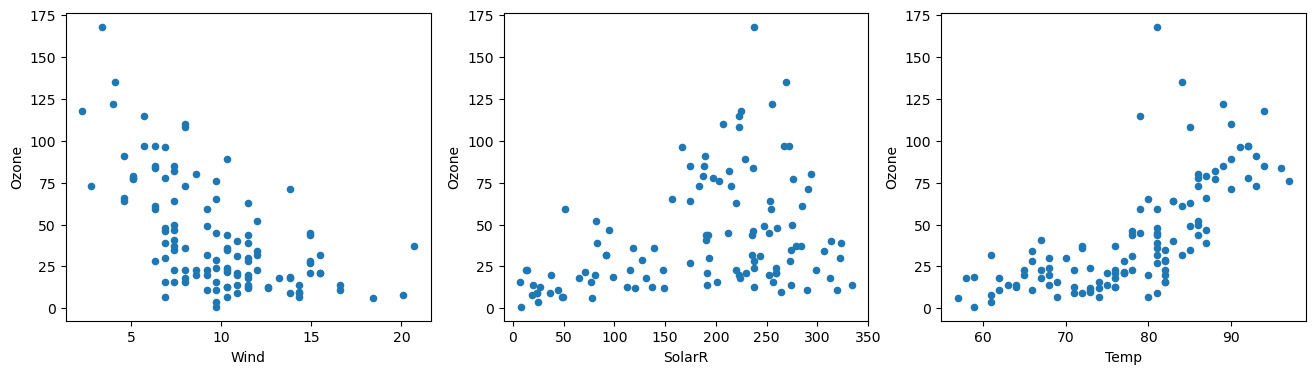

In [6]:
# Visualise the data

# split to make 3 plots:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16,4))

# scatter plots with Ozone versus the three other columns
Air.plot.scatter('Wind',    'Ozone', ax=ax0)
Air.plot.scatter('SolarR',  'Ozone', ax=ax1)
Air.plot.scatter('Temp',    'Ozone', ax=ax2)

The second plot seems to have variance increasing with increasing solar radiation

All plots seem to have more Ozone values that are relatively small and fewer values that are relatively large

We will now inspect the distribution of Ozone values (and consider whether a data-transformation a appropriate)

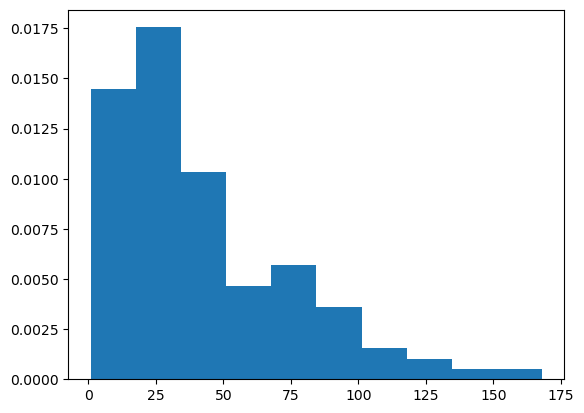

In [7]:
# Do a histogram of "Ozone" column
plt.hist(Air["Ozone"], density=True)
plt.show()

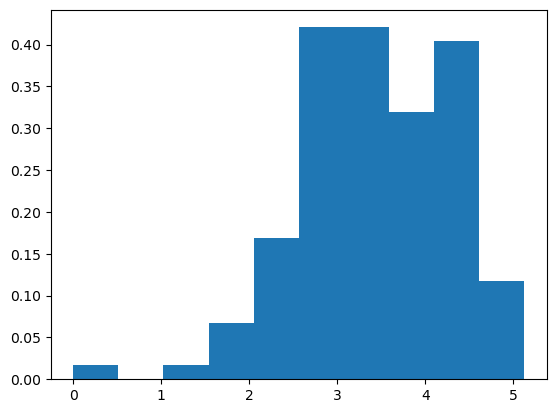

In [8]:
# Since the distribution is very skewed we will do a data-transformation and compute the logarithm of the Ozone column:
Air["logOzone"] = np.log(Air["Ozone"])
plt.hist(Air["logOzone"], density=True)
plt.show()

This distribution is nicer (but maybe not perfect - the value with logOzone=0 could be considered an outlier)

<Axes: xlabel='Temp', ylabel='logOzone'>

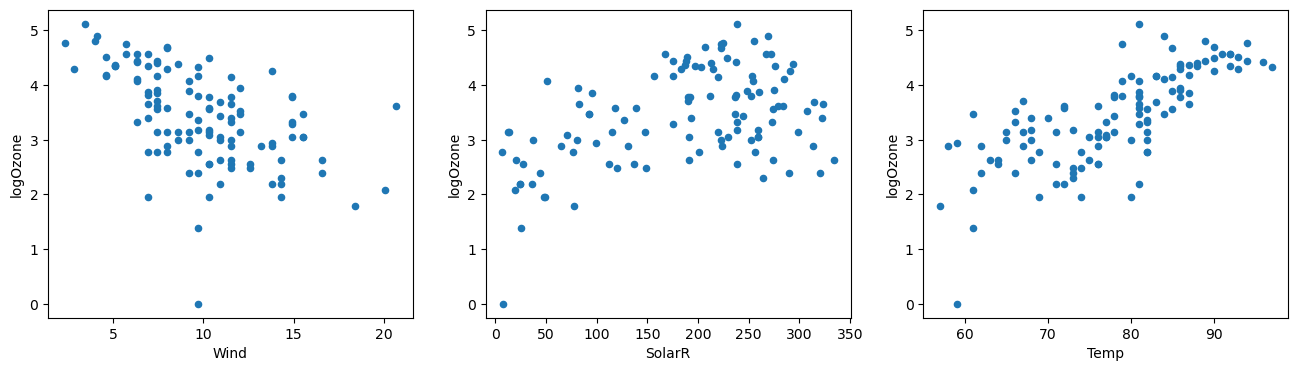

In [9]:
# Visualise the transformed data

# split to make 3 plots:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16,4))

# scatter plots with logOzone versus the three other columns
Air.plot.scatter('Wind',    'logOzone', ax=ax0)
Air.plot.scatter('SolarR',  'logOzone', ax=ax1)
Air.plot.scatter('Temp',    'logOzone', ax=ax2)

Considerations:

The datapoint with logOzone=0 could be an outlier - maybe we should remove it from the dataset.

We could model logOzone as a linear function of either wind, solar radiation or temperature. A linear regression models seems suitable. 

The time-series plot does not show any clear trends, but we could also consider a linear regression model for time. 

In [10]:
# remove the outlier:
Air = Air[(Air["logOzone"] != 0)]

In [11]:
print(len(Air))

152


#### Now we do **Simpel Linear Regression** with one explanatory variable at the time

In [12]:
# logOzone and temperature:
fit_temp = smf.ols(formula = 'logOzone ~ Temp', data=Air).fit() #ols er ordinary least square function, forklarende variabel er temp
print(fit_temp.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:               logOzone   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.536
No. Observations:                 115   F-statistic:                     132.8
Covariance Type:            nonrobust   Prob (F-statistic):           8.70e-21
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5004      0.433     -3.469      0.001      -2.357      -0.643
Temp           0.0634      0.006     11.522      0.000       0.053       0.074

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


husk beta0 er her intercept(skæring med y-aksen), og beta1 er Temp (slope/hældning)

hvis signifikans niveau er 0.05 er den forskellig, kig på konfidens interval (slopen er inde i konfidensintervallet) og og kig på værdi (0.000) - så den er signigikant forskelligt (true svar til kahoot)

### **>>> Kahoot 1 (3 questions)**

In [13]:
# Get prediction based on the model:
temp_range = pd.DataFrame({'Temp': np.arange(50,110, 10)})
pred = fit_temp.get_prediction(temp_range).summary_frame(alpha=0.05)
print(pred.head())

       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  1.670404  0.162595       1.348274       1.992534      0.534082   
1  2.304558  0.111726       2.083209       2.525907      1.192598   
2  2.938712  0.067721       2.804544       3.072880      1.840777   
3  3.572866  0.052418       3.469016       3.676717      2.478222   
4  4.207021  0.083470       4.041652       4.372389      3.104837   

   obs_ci_upper  
0      2.806726  
1      3.416519  
2      4.036648  
3      4.667511  
4      5.309204  


mean here is the predicted value of the outcome variable (logOzone)

### **>>> Kahoot 2 (1 questions)**

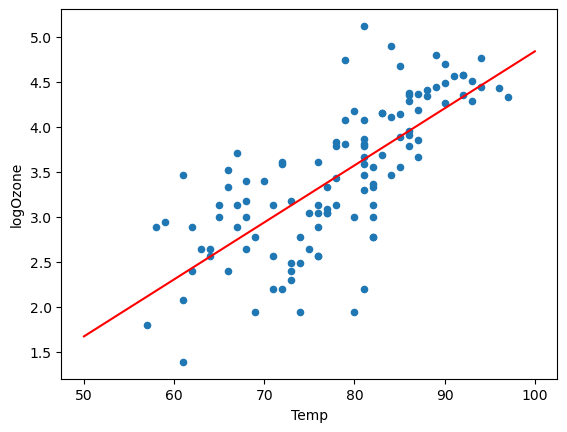

In [14]:
# Plot data with model predictions:
Air.plot.scatter('Temp',    'logOzone')
plt.plot(temp_range, pred["mean"], color="red")
plt.show()

                            OLS Regression Results                            
Dep. Variable:               logOzone   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.172
No. Observations:                 110   F-statistic:                     23.70
Covariance Type:            nonrobust   Prob (F-statistic):           3.87e-06
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7392      0.161     16.982      0.000       2.419       3.059
SolarR         0.0038      0.001      4.868      0.000       0.002       0.005

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


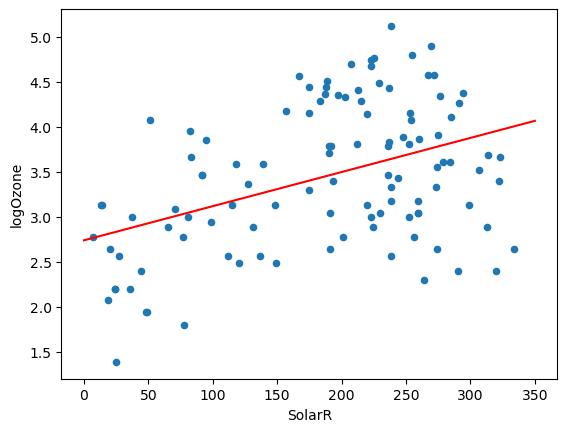

In [15]:
# logOzone verus solar radiation:

# fit the model
fit_rad = smf.ols(formula = 'logOzone ~ SolarR', data=Air).fit()
print(fit_rad.summary(slim=True))

# Get prediction based on the model:
rad_range = pd.DataFrame({'SolarR': np.arange(0,360, 10)})
pred = fit_rad.get_prediction(rad_range).summary_frame(alpha=0.05)

# Plot data with model predictions:
Air.plot.scatter('SolarR',    'logOzone')
plt.plot(rad_range, pred["mean"], color="red")
plt.show()


                            OLS Regression Results                            
Dep. Variable:               logOzone   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
No. Observations:                 115   F-statistic:                     57.65
Covariance Type:            nonrobust   Prob (F-statistic):           9.73e-12
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7377      0.181     26.227      0.000       4.380       5.096
Wind          -0.1307      0.017     -7.593      0.000      -0.165      -0.097

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


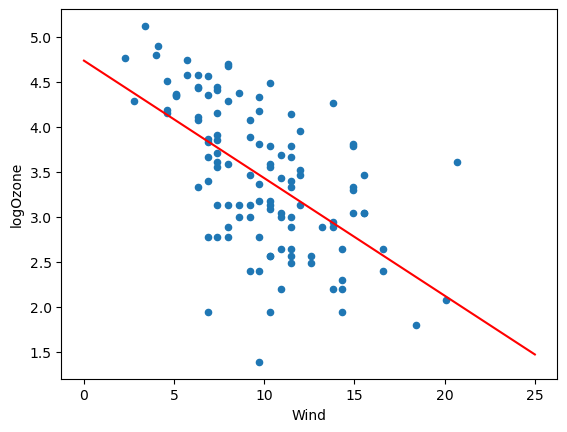

In [16]:
# logOzone verus wind:

# fit the model
fit_wind = smf.ols(formula = 'logOzone ~ Wind', data=Air).fit()
print(fit_wind.summary(slim=True))

# Get prediction based on the model:
wind_range = pd.DataFrame({'Wind': np.arange(0,30,5)})
pred = fit_wind.get_prediction(wind_range).summary_frame(alpha=0.05)

# Plot data with model predictions:
Air.plot.scatter('Wind',    'logOzone')
plt.plot(wind_range, pred["mean"], color="red")
plt.show()


#### Can we somehow combine all the variables into one model?? 

#### The answer is yes - with **Multiple Linear Regression** 

(return to slides/blackboard before proceding)


---

## **Multiple Linear Regression**

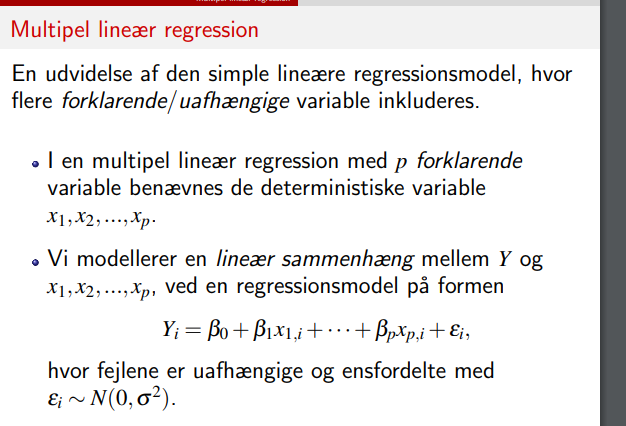

* X er uafhængige variabel
* y er afhængige variabel
* fejlen til sidst følger en normalfordeling med gennemsnit 0, og sigma i anden (sigma^2)

### Example: Ozon concentration with Multiple Linear Regression

In [17]:
# Mulitiple Linear Regression

# fit the full model with 3 explanatopry variables:
fit_full_model = smf.ols(formula = 'logOzone ~ Temp + SolarR + Wind', data=Air).fit()
print(fit_full_model.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:               logOzone   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.664
No. Observations:                 110   F-statistic:                     72.91
Covariance Type:            nonrobust   Prob (F-statistic):           1.16e-25
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2614      0.520      0.502      0.617      -0.770       1.293
Temp           0.0445      0.006      7.829      0.000       0.033       0.056
SolarR         0.0022      0.001      4.248      0.000       0.001       0.003
Wind          -0.0693      0.015     -4.774      0.000      -0.098      -0.041

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is lar

* husk er t her er t_obs

* Nu er der flere hælndinger, beta1, beta2 og beta3 (temp, solarR og wind)

* Den t fordeling vi skal bruge skal have n-4 frihedagrader (intercept, temp, solarR og wind)

There is a coefficient (parameter estimate) for each explanatory variable in the model (+ for the intercept)

Each parameter estimate also has a Standard Error

For each parameter a t-test is performed (t_obs and p-values and confidence intervals are calculated)

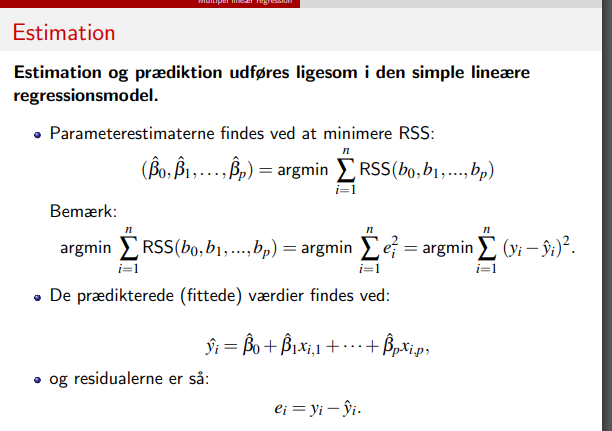

### Når man skal plotte multiple linear regression (der er flere x akser - planer):

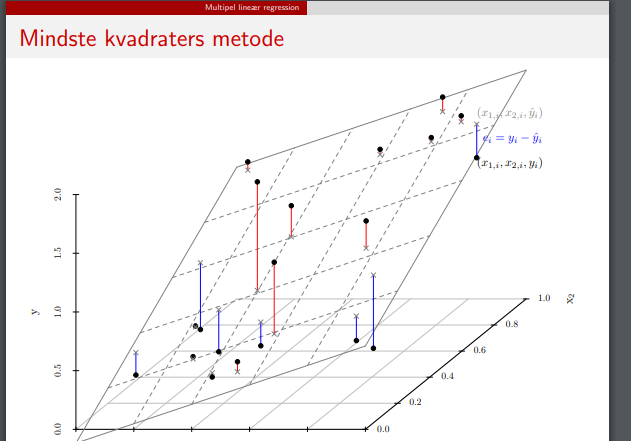

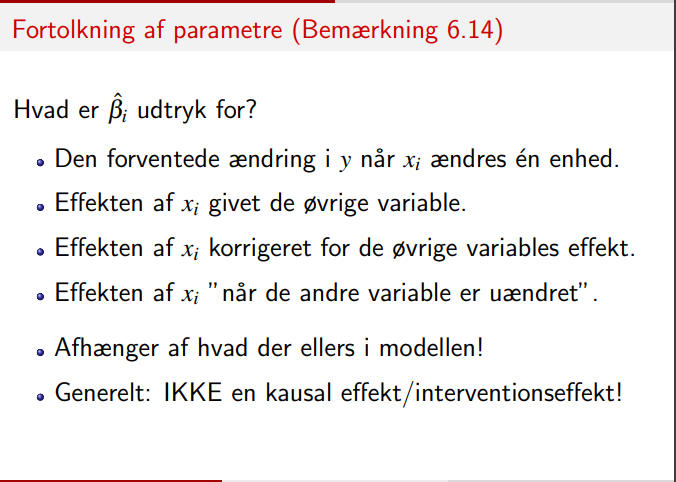

---

## **Konfidens- og prædikationsintervaller(confidence and predictionsintervals)**

### Example: Confidence and prediction intervals

In [18]:
# We will now predict for many values of Temp and Wind (but keep SolarR constant in order to be able to plot in only 3D: logOzone x Temp x Wind)

Temp_range = np.linspace(50, 100, 100)
Wind_range = np.linspace(0, 25, 100)
SolarR_new = Air["SolarR"].mean()

Temp_new, Wind_new = np.meshgrid(Temp_range, Wind_range)

In [19]:
New_data = pd.DataFrame({'Temp':   Temp_new.reshape(1,-1)[0],   # a bit of "wrangling" is needed
                         'SolarR': SolarR_new,
                         'Wind':   Wind_new.reshape(1,-1)[0]})
print(New_data)

            Temp      SolarR  Wind
0      50.000000  187.158621   0.0
1      50.505051  187.158621   0.0
2      51.010101  187.158621   0.0
3      51.515152  187.158621   0.0
4      52.020202  187.158621   0.0
...          ...         ...   ...
9995   97.979798  187.158621  25.0
9996   98.484848  187.158621  25.0
9997   98.989899  187.158621  25.0
9998   99.494949  187.158621  25.0
9999  100.000000  187.158621  25.0

[10000 rows x 3 columns]


In [20]:
pred = fit_full_model.get_prediction(New_data).summary_frame(alpha=0.05)    # get predictions
New_data_with_pred = pd.concat([New_data, pred], axis=1)                    # merge data with predictions
print(New_data_with_pred.head())
print(len(New_data_with_pred))

        Temp      SolarR  Wind      mean   mean_se  mean_ci_lower  \
0  50.000000  187.158621   0.0  2.894243  0.265920       2.367030   
1  50.505051  187.158621   0.0  2.916696  0.263441       2.394399   
2  51.010101  187.158621   0.0  2.939149  0.260969       2.421752   
3  51.515152  187.158621   0.0  2.961602  0.258506       2.449089   
4  52.020202  187.158621   0.0  2.984055  0.256051       2.476409   

   mean_ci_upper  obs_ci_lower  obs_ci_upper  
0       3.421455      1.829490      3.958995  
1       3.438993      1.854369      3.979023  
2       3.456545      1.879222      3.999075  
3       3.474115      1.904051      4.019153  
4       3.491701      1.928854      4.039256  
10000


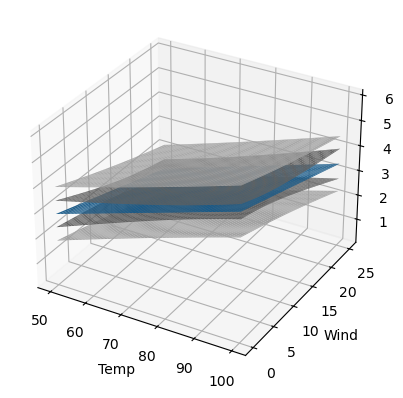

In [21]:
# Create a 3D plot 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot a surface
ax.plot_surface(np.array(New_data_with_pred["Temp"]).reshape(100,100),
                np.array(New_data_with_pred["Wind"]).reshape(100,100),
                np.array(New_data_with_pred["mean"]).reshape(100,100))

ax.plot_surface(np.array(New_data_with_pred["Temp"]).reshape(100,100),
                np.array(New_data_with_pred["Wind"]).reshape(100,100),
                np.array(New_data_with_pred["mean_ci_upper"]).reshape(100,100), color="grey")

ax.plot_surface(np.array(New_data_with_pred["Temp"]).reshape(100,100),
                np.array(New_data_with_pred["Wind"]).reshape(100,100),
                np.array(New_data_with_pred["mean_ci_lower"]).reshape(100,100), color="grey")

ax.plot_surface(np.array(New_data_with_pred["Temp"]).reshape(100,100),
                np.array(New_data_with_pred["Wind"]).reshape(100,100),
                np.array(New_data_with_pred["obs_ci_upper"]).reshape(100,100), color="lightgrey")

ax.plot_surface(np.array(New_data_with_pred["Temp"]).reshape(100,100),
                np.array(New_data_with_pred["Wind"]).reshape(100,100),
                np.array(New_data_with_pred["obs_ci_lower"]).reshape(100,100), color="lightgrey")

# Add labels
ax.set_xlabel('Temp')
ax.set_ylabel('Wind')
ax.set_zlabel('logOzone')

#ax.view_init(elev=20, azim=10) 

plt.show()

---

## **Modeludvælgelse (Model selection)**

### Example: Model selection

In [22]:
# re-visit the Multiple Linear Regression model:
print(fit_full_model.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:               logOzone   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.664
No. Observations:                 110   F-statistic:                     72.91
Covariance Type:            nonrobust   Prob (F-statistic):           1.16e-25
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2614      0.520      0.502      0.617      -0.770       1.293
Temp           0.0445      0.006      7.829      0.000       0.033       0.056
SolarR         0.0022      0.001      4.248      0.000       0.001       0.003
Wind          -0.0693      0.015     -4.774      0.000      -0.098      -0.041

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is lar

* temp, solarR og wind er signifikante fordi p værdi er 0.000

Can we have even more variables?

Are more variables always better?

#### How do we select the best model? How do we choose which explanatory variables to include?

   Ozone  SolarR  Wind  Temp  Month  Day  logOzone      fake
0   41.0   190.0   7.4    67      5    1  3.713572 -0.400725
1   36.0   118.0   8.0    72      5    2  3.583519  0.460023
2   12.0   149.0  12.6    74      5    3  2.484907 -0.925871
3   18.0   313.0  11.5    62      5    4  2.890372 -0.752708
4    NaN     NaN  14.3    56      5    5       NaN -0.780130


C:\Users\Visnu\AppData\Local\Temp\ipykernel_8672\1914143277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Air["fake"] = stats.norm.rvs(size=len(Air))


<Axes: xlabel='fake', ylabel='logOzone'>

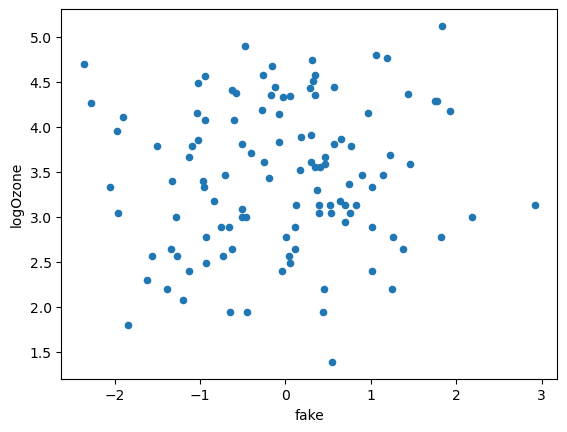

In [23]:
# First imagine we had even MORE explanatory variables:

# lets make a "fake" variable:
Air["fake"] = stats.norm.rvs(size=len(Air))
print(Air.head())

Air.plot.scatter('fake',    'logOzone')

What would happen if we added this "fake" variable to the full model?

In [24]:
fit_full_model = smf.ols(formula = 'logOzone ~ Temp + SolarR + Wind + fake', data=Air).fit()
print(fit_full_model.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:               logOzone   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.661
No. Observations:                 110   F-statistic:                     54.21
Covariance Type:            nonrobust   Prob (F-statistic):           1.05e-24
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2452      0.527      0.465      0.643      -0.800       1.291
Temp           0.0445      0.006      7.797      0.000       0.033       0.056
SolarR         0.0022      0.001      4.221      0.000       0.001       0.003
Wind          -0.0684      0.015     -4.558      0.000      -0.098      -0.039
fake           0.0107      0.045      0.239      0.812      -0.078       0.100

Notes:
[1] Standard Errors assume that the covarian

The "slope" parameter for "fake" is not significant (not significantly different from zero). 

This is because "fake" carries no information - it is just random values.

* Når værdien 0 er med i konfidensintervallet er den ikke signifikant

**Model Selection:**

So the question is how to choose which variable to include in a model - its not always better to include more variables. 

There are different approaches for selecting which explanatory variables to include in the model (*model selection*):

*Backward selection*: Remove the least significant variables one at the time

*Forward selection*: Start with the most significant variable and add one at the time

OBS: There is no perfect way to do model selection! One should also be aware of possible correlations in explanatory variables. 

* **Den mindst signifikante er den med den største p værdi**

---

## **Modelkontrol (analyse a residualerne) - Modelcontrol**

### Example: Model control

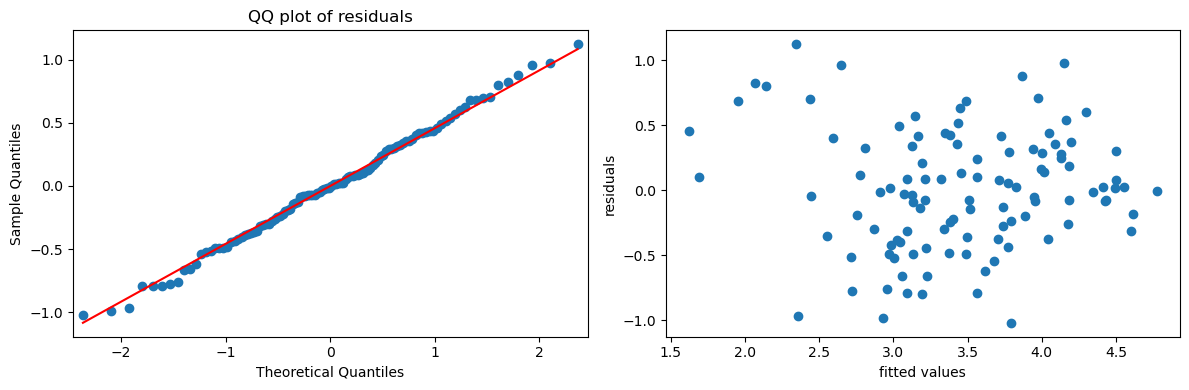

In [25]:
# full model with 3 explanatory variables:
fit_full_model = smf.ols(formula = 'logOzone ~ Temp + SolarR + Wind', data=Air).fit()

# residuals:
residuals = fit_full_model.resid
fittedvalues = fit_full_model.fittedvalues

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))

# qq-plot of resiudals:
sm.qqplot(residuals,ax=ax1, line='s')
ax1.set_title("QQ plot of residuals")

# plot residuals versus fitted values:
ax2.scatter(fittedvalues,residuals)
ax2.set_xlabel("fitted values")
ax2.set_ylabel("residuals")

plt.tight_layout()
plt.show()

qq-plot check normality of residuals

scatter plot is used to look for patterns in residuals

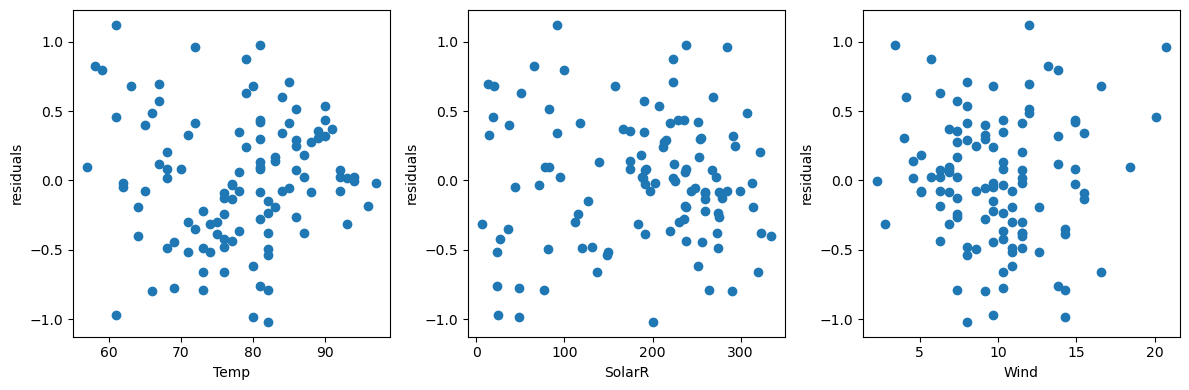

In [26]:
# plot residuals versus individual explanatory variables:
Air["residuals"] = residuals
fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,4))

# plot residuals versus fitted values:
ax0.scatter(Air["Temp"],Air["residuals"])
ax0.set_xlabel("Temp")
ax0.set_ylabel("residuals")

ax1.scatter(Air["SolarR"],Air["residuals"])
ax1.set_xlabel("SolarR")
ax1.set_ylabel("residuals")

ax2.scatter(Air["Wind"],Air["residuals"])
ax2.set_xlabel("Wind")
ax2.set_ylabel("residuals")

plt.tight_layout()
plt.show()

---

## **Kurvelinearitet**

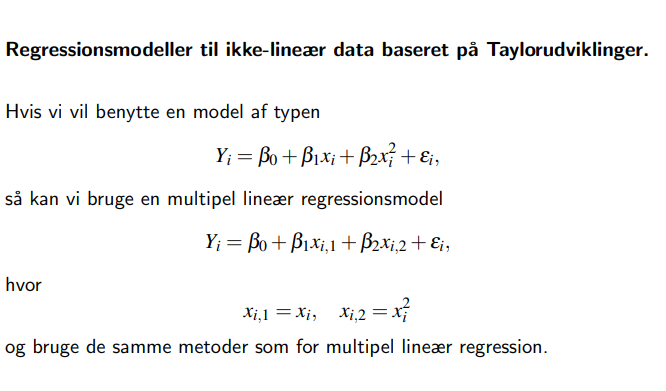

### Example: curvilinear regression

<Axes: xlabel='Temp', ylabel='logOzone'>

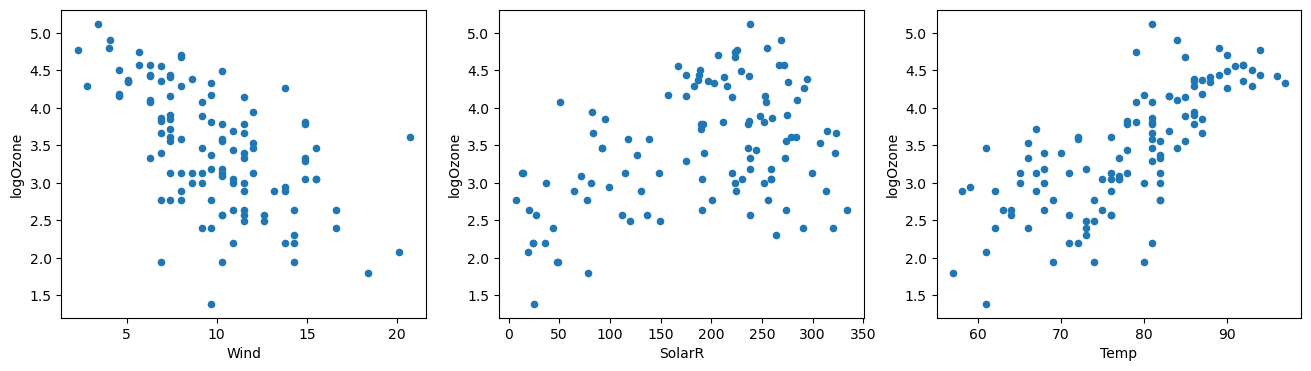

In [27]:
# Look at the original data (but with log(ozone))

# split to make 4 plots:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16,4))

# scatter plots with logOzone versus the three other columns
Air.plot.scatter('Wind',    'logOzone', ax=ax0)
Air.plot.scatter('SolarR', 'logOzone', ax=ax1)
Air.plot.scatter('Temp',    'logOzone', ax=ax2)

Would it be a good idea to include some squared terms?

Lets try with **Wind**:

                            OLS Regression Results                            
Dep. Variable:               logOzone   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
No. Observations:                 115   F-statistic:                     57.65
Covariance Type:            nonrobust   Prob (F-statistic):           9.73e-12
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7377      0.181     26.227      0.000       4.380       5.096
Wind          -0.1307      0.017     -7.593      0.000      -0.165      -0.097

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


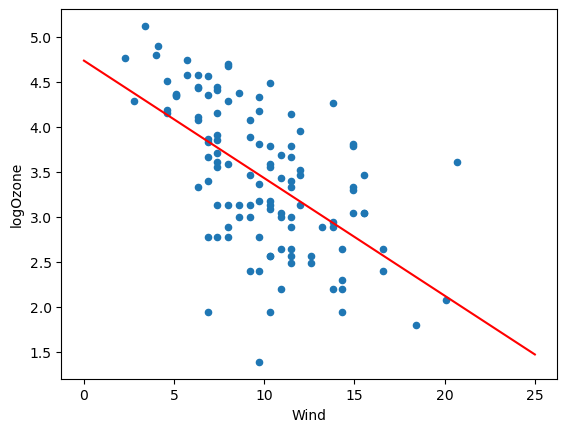

In [28]:
# Linear model with wind (simple linear regression):

# fit the model
fit_wind = smf.ols(formula = 'logOzone ~ Wind', data=Air).fit()
print(fit_wind.summary(slim=True))

# Get prediction based on the model:
wind_range = pd.DataFrame({'Wind': np.arange(0,25.5,.5)})
pred = fit_wind.get_prediction(wind_range).summary_frame(alpha=0.05)

# Plot data with model predictions:
Air.plot.scatter('Wind',    'logOzone')
plt.plot(wind_range, pred["mean"], color="red")
plt.show()

In [29]:
print(fit_wind.ssr)

49.234525212609526


In [30]:
# make column with wind-squared values:
Air["Wind2"] = Air["Wind"]**2
print(Air.head())

   Ozone  SolarR  Wind  Temp  Month  Day  logOzone      fake  residuals  \
0   41.0   190.0   7.4    67      5    1  3.713572 -0.400725   0.570031   
1   36.0   118.0   8.0    72      5    2  3.583519  0.460023   0.416974   
2   12.0   149.0  12.6    74      5    3  2.484907 -0.925871  -0.519755   
3   18.0   313.0  11.5    62      5    4  2.890372 -0.752708  -0.016249   
4    NaN     NaN  14.3    56      5    5       NaN -0.780130        NaN   

    Wind2  
0   54.76  
1   64.00  
2  158.76  
3  132.25  
4  204.49  


In [31]:
# Model with Wind and Wind2

# fit the model
fit_wind2 = smf.ols(formula = 'logOzone ~ Wind + Wind2', data=Air).fit()
print(fit_wind2.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:               logOzone   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.377
No. Observations:                 115   F-statistic:                     35.44
Covariance Type:            nonrobust   Prob (F-statistic):           1.19e-12
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7535      0.379     15.168      0.000       5.002       6.505
Wind          -0.3458      0.073     -4.723      0.000      -0.491      -0.201
Wind2          0.0100      0.003      3.016      0.003       0.003       0.017

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


This looks great - wind-squared is also significant. 

Is it a better model than the linear one?

In [32]:
print(fit_wind2.ssr)

45.53655575703114


sum of squared residuals is smaller - indicating a better model?

(Also R-squared is larger - see output-tables above)

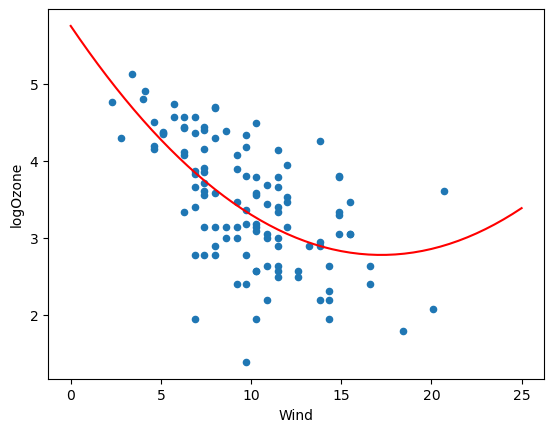

In [33]:
# Visual inspection:

# Get prediction based on the model:
wind_range["Wind2"] = wind_range["Wind"]**2
pred2 = fit_wind2.get_prediction(wind_range).summary_frame(alpha=0.05)

# Plot data with model predictions:
Air.plot.scatter('Wind',    'logOzone')
plt.plot(wind_range["Wind"], pred2["mean"], color="red")
plt.show()

Is it a better model?

Is it an *"overfit"*?

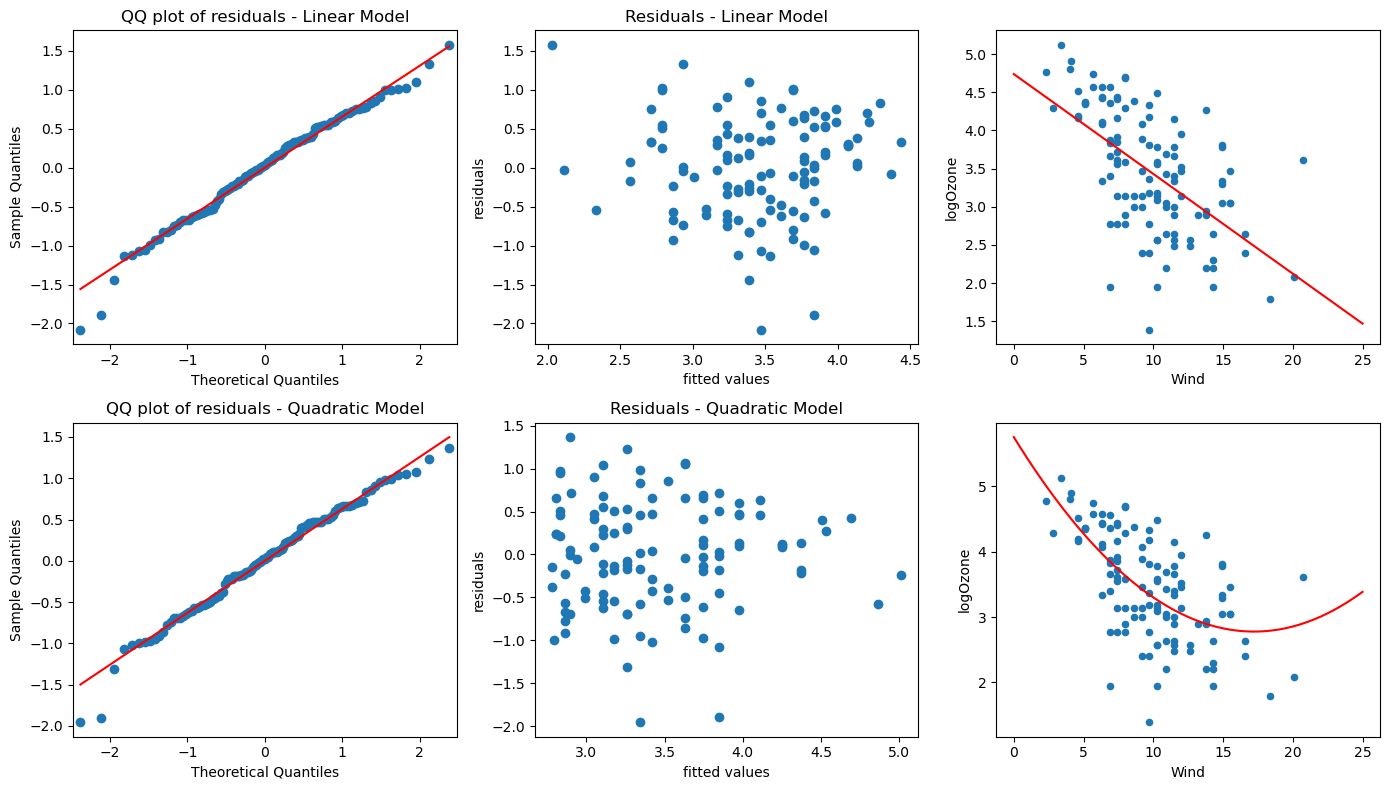

In [34]:
# lets have a quick look at the residuals in both linear and quadratic cases:
# residuals:
residuals = fit_wind.resid
fittedvalues = fit_wind.fittedvalues

residuals2 = fit_wind2.resid
fittedvalues2 = fit_wind2.fittedvalues


fig, axs = plt.subplots(2,3,figsize=(14,8))

# for linear model:
# qq-plot of resiudals:
sm.qqplot(residuals,ax=axs[0,0], line='s')
axs[0,0].set_title("QQ plot of residuals - Linear Model")

# plot residuals versus fitted values:
axs[0,1].scatter(fittedvalues,residuals)
axs[0,1].set_xlabel("fitted values")
axs[0,1].set_ylabel("residuals")
axs[0,1].set_title("Residuals - Linear Model")

# plot data with model
Air.plot.scatter('Wind',    'logOzone', ax = axs[0,2])
axs[0,2].plot(wind_range["Wind"], pred["mean"], color="red")

# for quadratic model:
# qq-plot of resiudals:
sm.qqplot(residuals2,ax=axs[1,0], line='s')
axs[1,0].set_title("QQ plot of residuals - Quadratic Model")

# plot residuals versus fitted values:
axs[1,1].scatter(fittedvalues2,residuals2)
axs[1,1].set_xlabel("fitted values")
axs[1,1].set_ylabel("residuals")
axs[1,1].set_title("Residuals - Quadratic Model")

# plot data with model
Air.plot.scatter('Wind',    'logOzone', ax = axs[1,2])
axs[1,2].plot(wind_range["Wind"], pred2["mean"], color="red")


plt.tight_layout()
plt.show()

Which model is better?

### **>>> Kahoot (1 question)**

y = beta0 + beta1*x1, her må x1 gerne være i anden(x1^2), men det må beta_1 fx ikke, fordi så er den ikke linear mere, elelr b1 kan ikke være sinus fx, den må ikke være andet end linear

---

## **Kollinearitet**

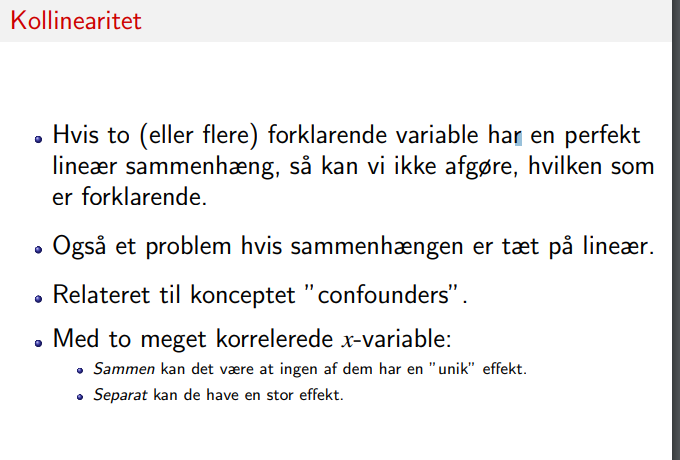

### Example: Colinearity and confounding

In [35]:
# lets make a fake variable which is super correlated to Wind:
Air["fake_wind"] = 2*Air["Wind"] + stats.norm.rvs(size=len(Air), loc=0, scale=1)
print(Air.head())

   Ozone  SolarR  Wind  Temp  Month  Day  logOzone      fake  residuals  \
0   41.0   190.0   7.4    67      5    1  3.713572 -0.400725   0.570031   
1   36.0   118.0   8.0    72      5    2  3.583519  0.460023   0.416974   
2   12.0   149.0  12.6    74      5    3  2.484907 -0.925871  -0.519755   
3   18.0   313.0  11.5    62      5    4  2.890372 -0.752708  -0.016249   
4    NaN     NaN  14.3    56      5    5       NaN -0.780130        NaN   

    Wind2  fake_wind  
0   54.76  15.065808  
1   64.00  16.979902  
2  158.76  26.020201  
3  132.25  24.655426  
4  204.49  29.059242  


<Axes: xlabel='fake_wind', ylabel='logOzone'>

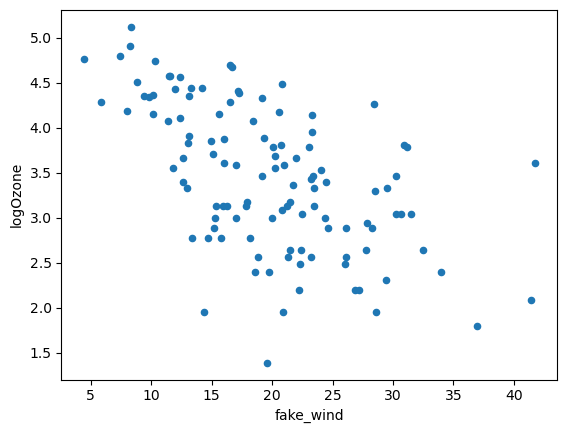

In [36]:
Air.plot.scatter('fake_wind',    'logOzone')

<Axes: xlabel='fake_wind', ylabel='Wind'>

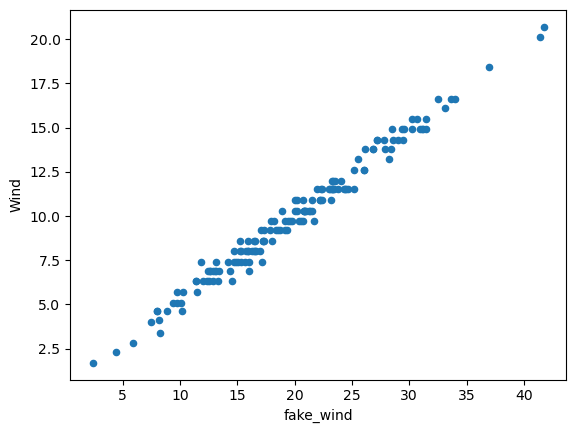

In [37]:
Air.plot.scatter('fake_wind',    'Wind')

In [38]:
# Now we fit a model using both Wind and fake_wind:
fit_full_model = smf.ols(formula = 'logOzone ~ Temp + SolarR + Wind + fake_wind', data=Air).fit()
print(fit_full_model.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:               logOzone   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.667
No. Observations:                 110   F-statistic:                     55.54
Covariance Type:            nonrobust   Prob (F-statistic):           4.47e-25
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2423      0.519      0.467      0.641      -0.786       1.271
Temp           0.0451      0.006      7.944      0.000       0.034       0.056
SolarR         0.0021      0.001      3.966      0.000       0.001       0.003
Wind          -0.1981      0.097     -2.040      0.044      -0.391      -0.006
fake_wind      0.0639      0.048      1.342      0.183      -0.031       0.158

Notes:
[1] Standard Errors assume that the covarian

Both Wind and fake_wind become insignificant. (blackboard) 

### **>>> Kahoot (1 question)**